In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np
from stats import TestStats

In [2]:
num_influencers = 1
num_consumer_producers = 15

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, production_rate, external_production_rate)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_consumer_producers):
    cons_func = lambda x: inverse_decay(x, 1, 2)
    prod_func = lambda x: inverse_decay(x, 1, 2)
    consumer_producer = ConsumerProducer(prod_func, cons_func, 20, 3, 1, init_following_rates_method='equal')
    #consumer_producer = ImperfectConsumerProducer(prod_func, cons_func, 10, 3, 1, init_following_rates_method='zero')
    content_market.add_agent(consumer_producer)

    color = np.random.rand(3,)
    agent_colors[consumer_producer.index] = color

for i in range(num_influencers):
    influencer = Influencer(40, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

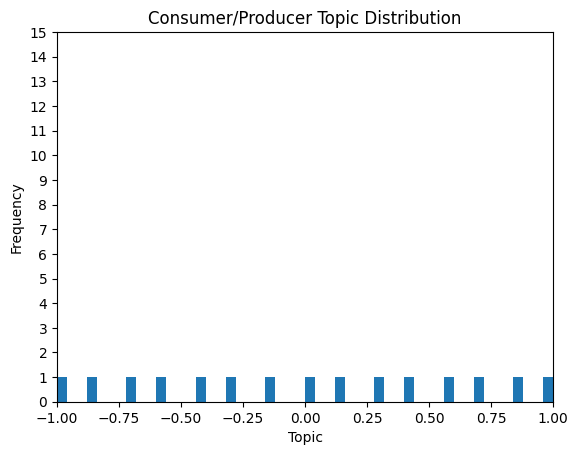

In [8]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution", content_market.consumers, -1, 1)

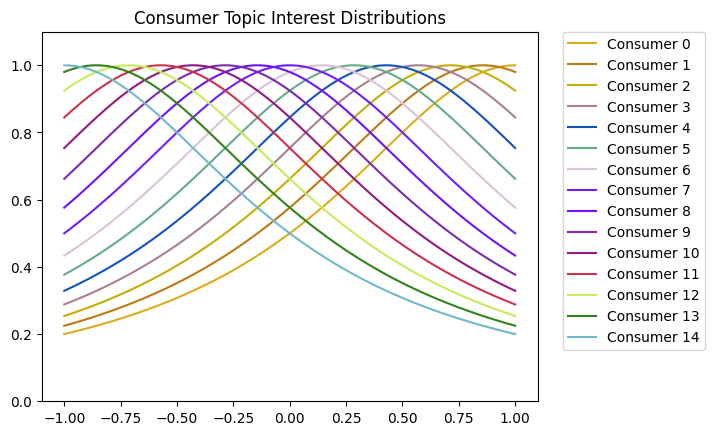

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions", content_market.consumers, -1, 1, agent_colors)

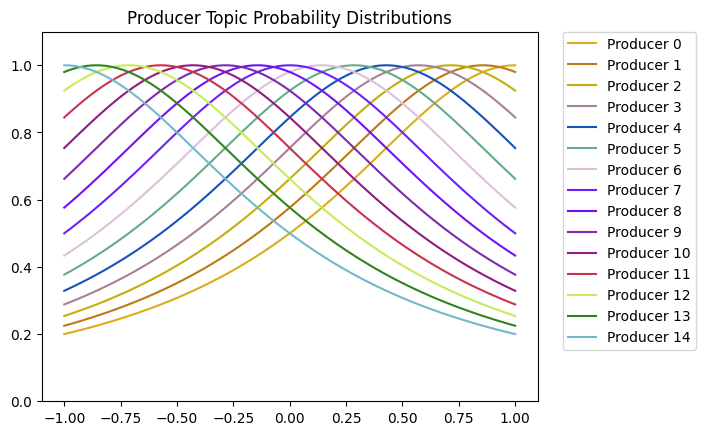

In [10]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions", content_market.producers, -1, 1, agent_colors)

In [11]:
stats: TestStats = content_market.optimize(100)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing consumer 12
Optimizing consumer 13
Optimizing consumer 14
Optimizing influencer 15
Optimizing producer 0
Optimization succeeded (overall 0.0066737920278683305s): nit=4, nfev=12, njev=6.
Optimizing producer 1
Optimization succeeded (overall 0.005770792020484805s): nit=4, nfev=12, njev=6.
Optimizing producer 2
Optimization succeeded (overall 0.0057917500380426645s): nit=4, nfev=12, njev=6.
Optimizing producer 3
Optimization succeeded (overall 0.005868625012226403s): nit=4, nfev=12, njev=6.
Optimizing producer 4
Optimization succeeded (overall 0.005758000072091818s): nit=4, nfev=12, njev=6.
Optimizing producer 5
Optimization succeeded (overall 0.004820458008907735s): nit=3, nfev=10, njev=5.
Optimizing producer 6
Opti

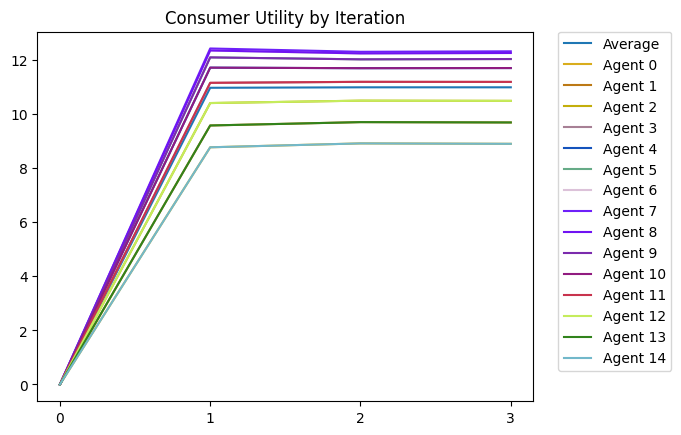

In [12]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility)

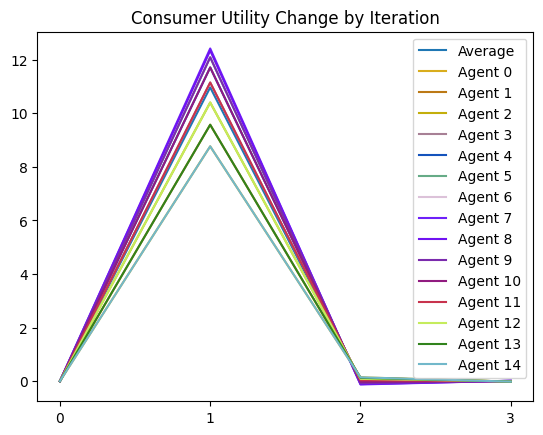

In [13]:
visualize.plot_agent_utility_change_by_iteration("Consumer Utility Change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility_change)

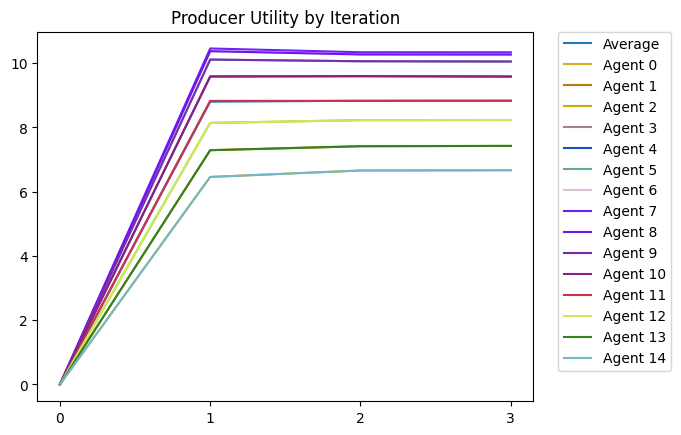

In [14]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility)

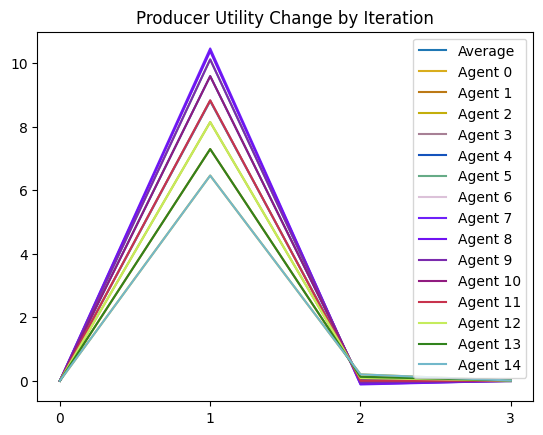

In [15]:
visualize.plot_agent_utility_change_by_iteration("Producer Utility Change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility_change)

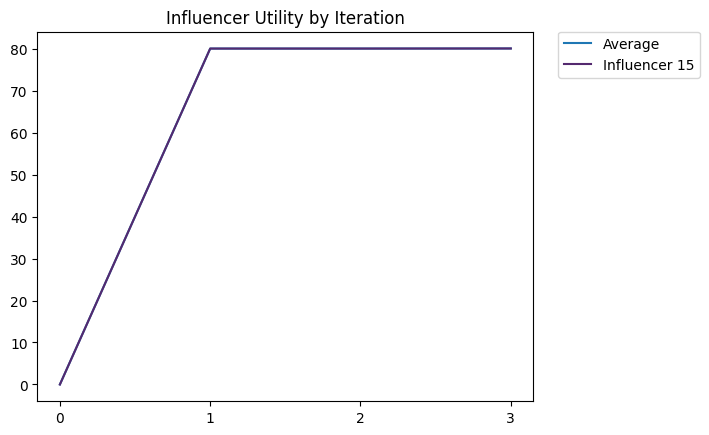

In [16]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_utility)

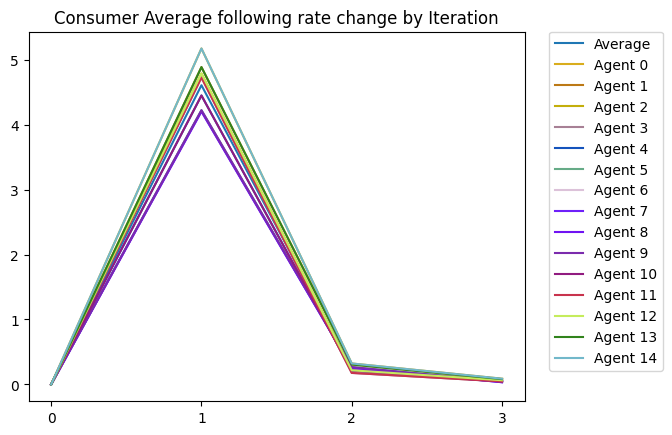

In [17]:
visualize.plot_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_rate_change)

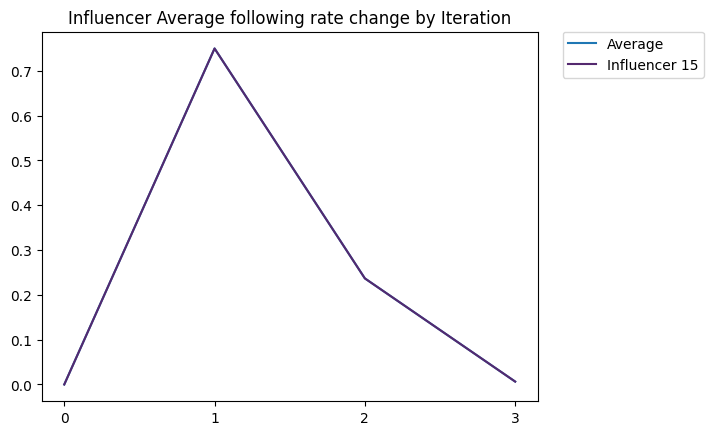

In [18]:
visualize.plot_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_rate_change)

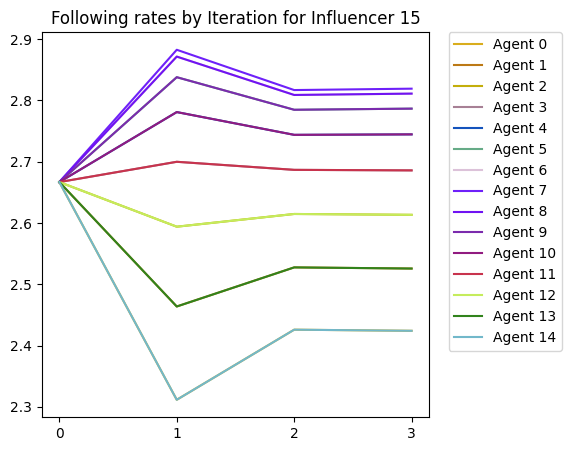

In [19]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, stats.influencer_stats)

In [20]:
content_market.influencers[0].get_following_rate_vector()

array([2.42414761, 2.52566347, 2.61325952, 2.68570904, 2.74442456,
       2.78640674, 2.81090328, 2.81896327, 2.81090069, 2.78640776,
       2.74442984, 2.6857091 , 2.6132618 , 2.52566526, 2.42414804,
       0.        , 0.        ])

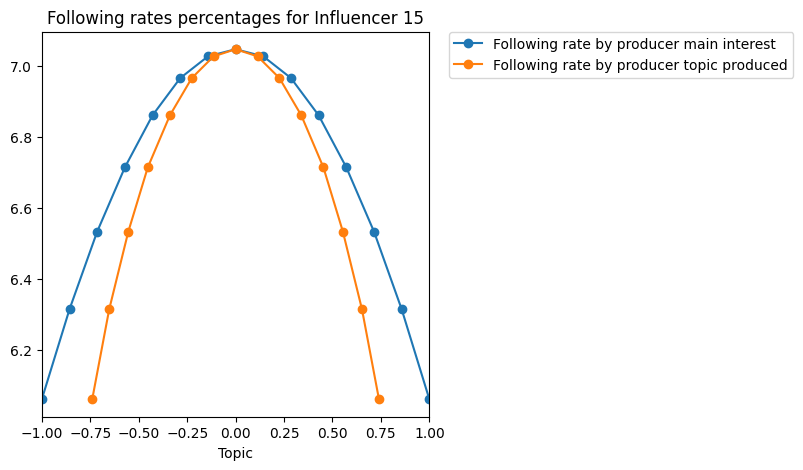

In [21]:
visualize.plot_agent_following_rates(content_market.influencers, stats.influencer_stats, agent_colors)

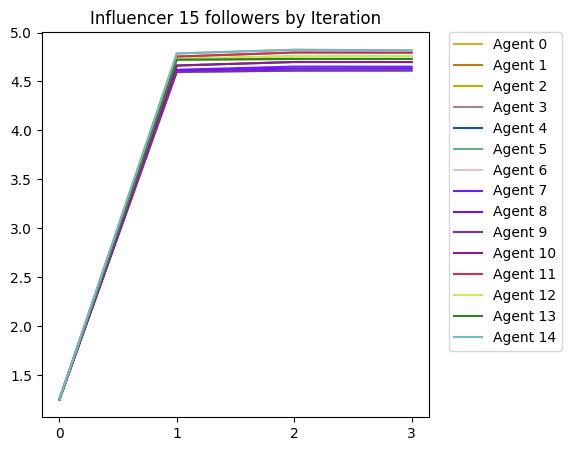

In [22]:
visualize.plot_follows_by_iteration(content_market.influencers, content_market.consumers, agent_colors, stats.consumer_stats)

In [23]:
[p.topic_produced for p in content_market.producers]

[array([0.7399412]),
 array([0.65223331]),
 array([0.55368038]),
 array([0.45313449]),
 array([0.33889921]),
 array([0.22615653]),
 array([0.11374153]),
 array([0.]),
 array([-0.11374155]),
 array([-0.22615656]),
 array([-0.33889917]),
 array([-0.4531345]),
 array([-0.55368045]),
 array([-0.65223332]),
 array([-0.7399412])]

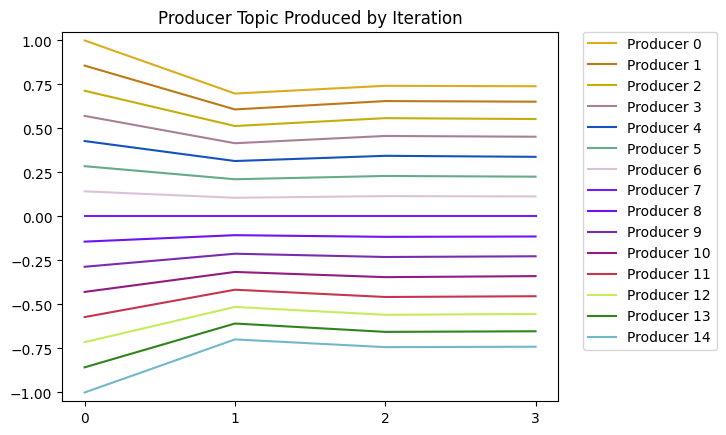

In [24]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats, False)

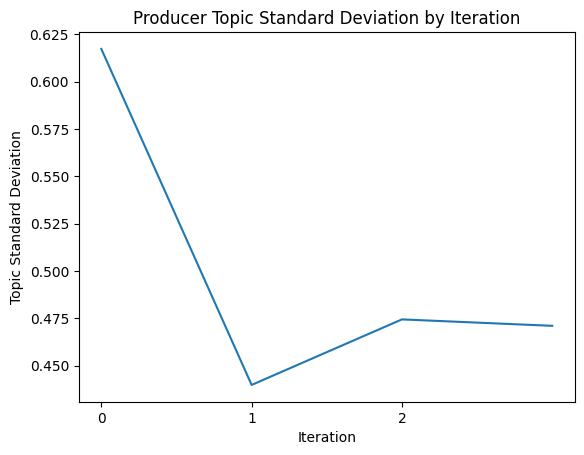

In [25]:
visualize.plot_value_by_iteration("Producer Topic Standard Deviation by Iteration", stats, "producer_topic_standard_deviation", "Topic Standard Deviation")

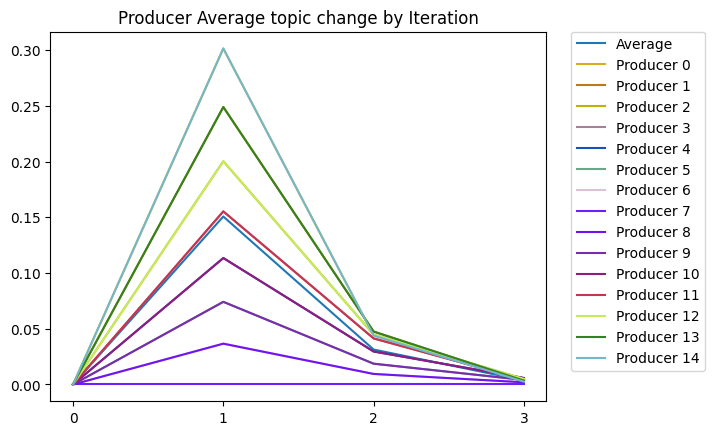

In [26]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_change)

In [27]:
stats.total_social_welfare[-1]

164.7100394681467

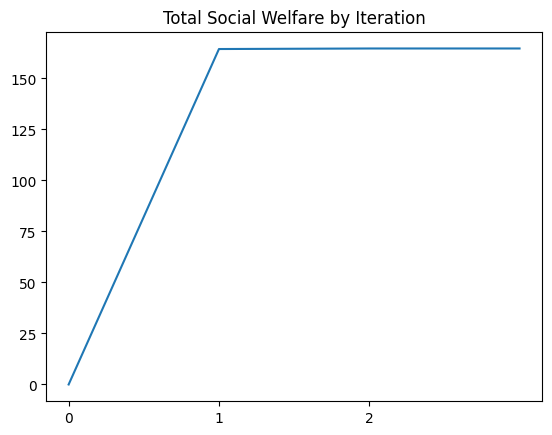

In [28]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", stats)

In [29]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

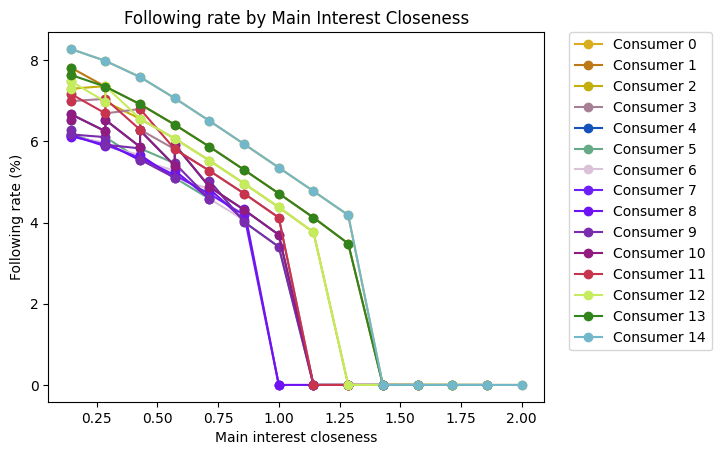

In [30]:
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, stats.consumer_stats)

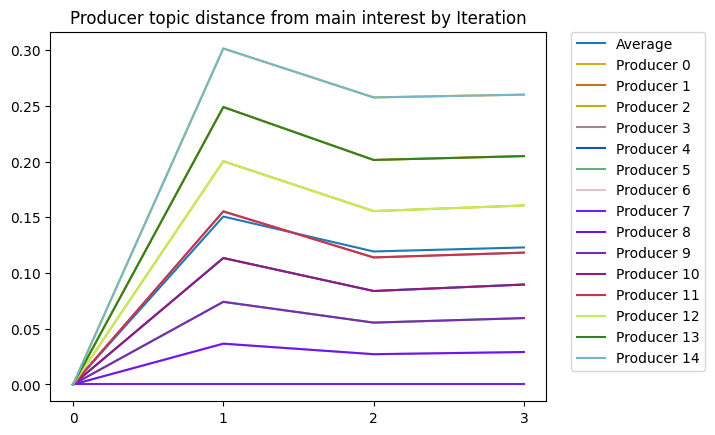

In [31]:
visualize.plot_producer_topic_distance_from_main_interest_by_iteration("Producer topic distance from main interest by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_distance_from_main_interest)

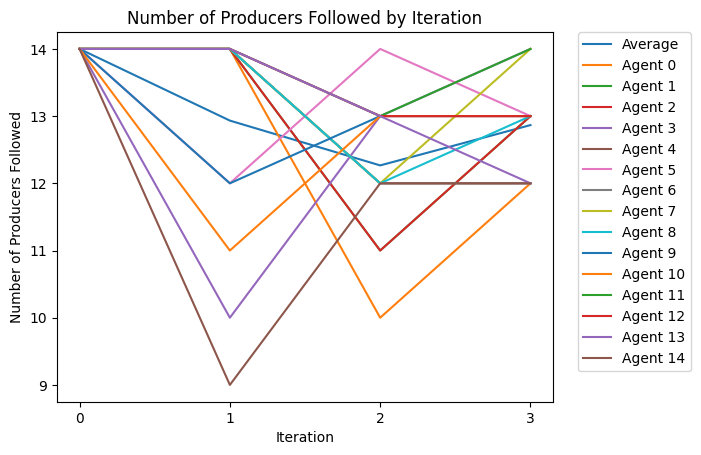

In [32]:
visualize.plot_value_by_agent_by_iteration("Number of Producers Followed by Iteration", stats.consumer_stats, "num_producers_followed", "Number of Producers Followed", stats.average_consumer_num_producers_followed)

[[ 1.         -0.36434277]
 [-0.36434277  1.        ]]


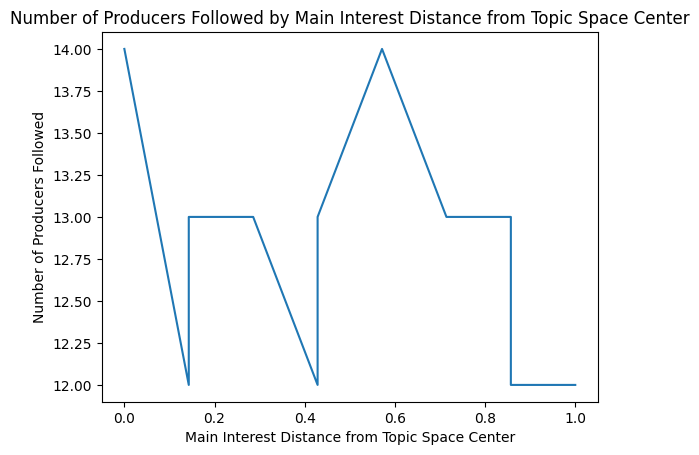

In [33]:
num_prods_by_main_interest_magnitude = []
topic_center = np.array([(bound[0] + bound[1]) / 2 for bound in content_market.topics_bounds])

for consumer in content_market.consumers:
    main_interest_mag = np.linalg.norm(consumer.main_interest - topic_center)
    num_prods_by_main_interest_magnitude.append((main_interest_mag, stats.consumer_stats[consumer.index].num_producers_followed[-1]))

num_prods_by_main_interest_magnitude.sort(key=lambda x: x[0])
print(np.corrcoef([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude]))
plt.figure()
plt.plot([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude])
plt.xlabel("Main Interest Distance from Topic Space Center")
plt.ylabel("Number of Producers Followed")
plt.title("Number of Producers Followed by Main Interest Distance from Topic Space Center")
plt.show()

In [43]:
for consumer in content_market.consumers:
    print(consumer.get_following_rate_vector())

[0.00000000e+00 1.65580281e+00 1.59684118e+00 1.51726551e+00
 1.41308322e+00 1.30109877e+00 1.18678377e+00 1.07083351e+00
 9.54679968e-01 8.37093722e-01 0.00000000e+00 0.00000000e+00
 4.48208973e-17 9.16040887e-17 1.50946356e-16 4.81822039e+00
 3.64829715e+00]
[1.56413651e+00 0.00000000e+00 1.52796025e+00 1.46999776e+00
 1.38331599e+00 1.28243984e+00 1.17392043e+00 1.05990645e+00
 9.43295657e-01 8.24441505e-01 6.96747589e-01 8.20356847e-17
 0.00000000e+00 4.90386970e-17 2.37781882e-17 4.73005408e+00
 3.34378393e+00]
[1.47252006e+00 1.49675267e+00 0.00000000e+00 1.45947840e+00
 1.39578678e+00 1.31156532e+00 1.21373131e+00 1.10589797e+00
 9.92484828e-01 8.75685199e-01 7.52160670e-01 6.30197574e-17
 0.00000000e+00 7.15383460e-17 4.37394643e-17 4.75962129e+00
 3.16431551e+00]
[1.35983242e+00 1.40972607e+00 1.43452328e+00 0.00000000e+00
 1.39845401e+00 1.33825422e+00 1.25785369e+00 1.16167534e+00
 1.05540185e+00 9.43158858e-01 8.24347790e-01 8.31970247e-17
 4.63314518e-17 1.98527842e-18 2.4

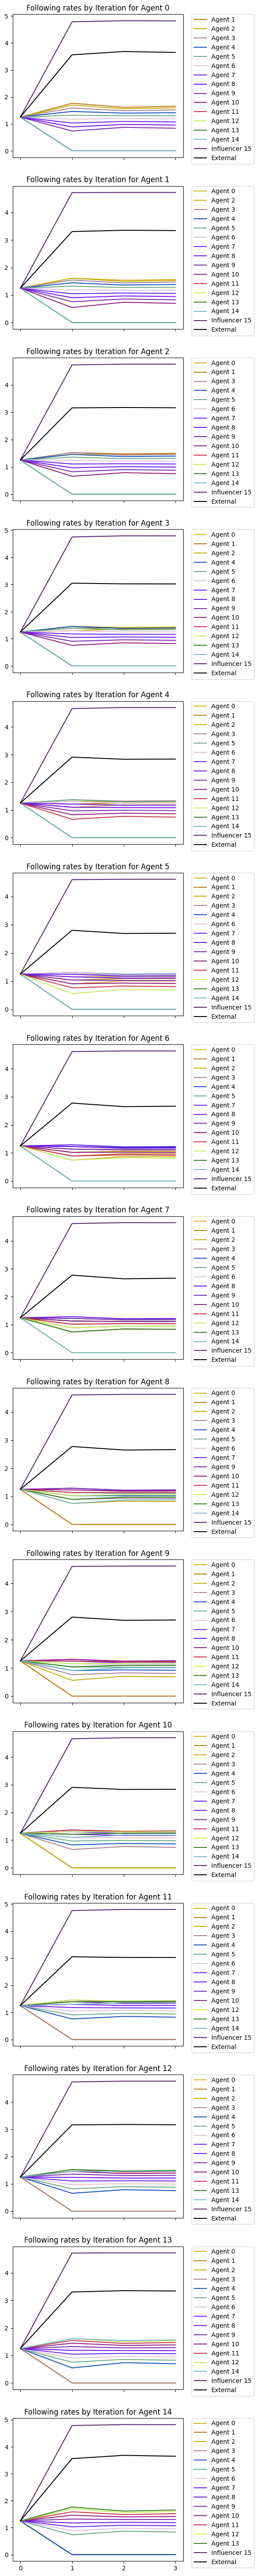

In [34]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, stats.consumer_stats)

In [35]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

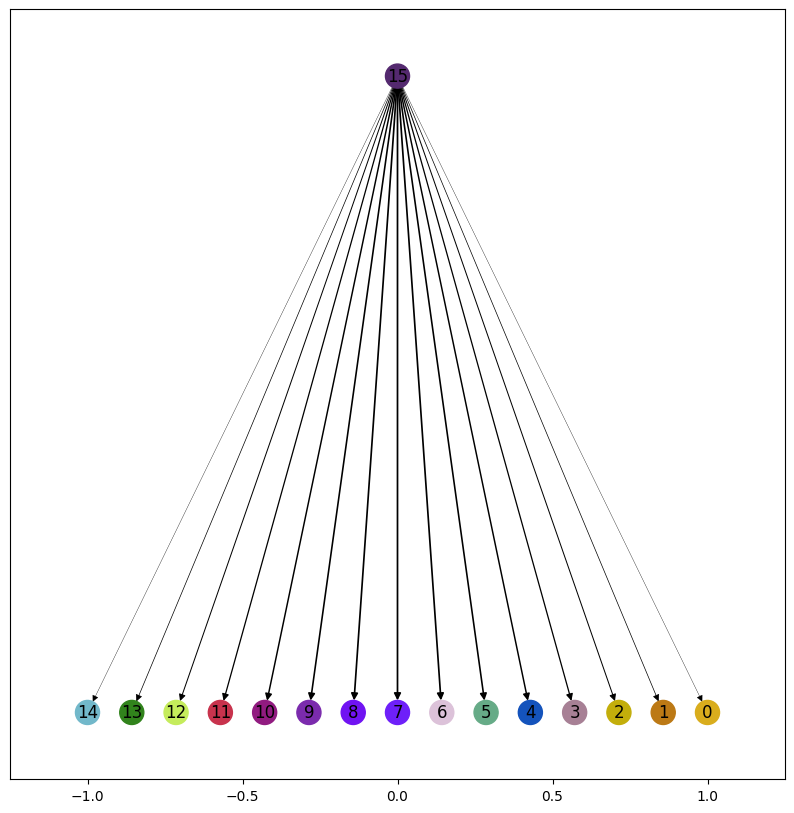

In [36]:
visualize.visualize_influencer(content_market, stats.influencer_stats[content_market.influencers[0].index], agent_colors)

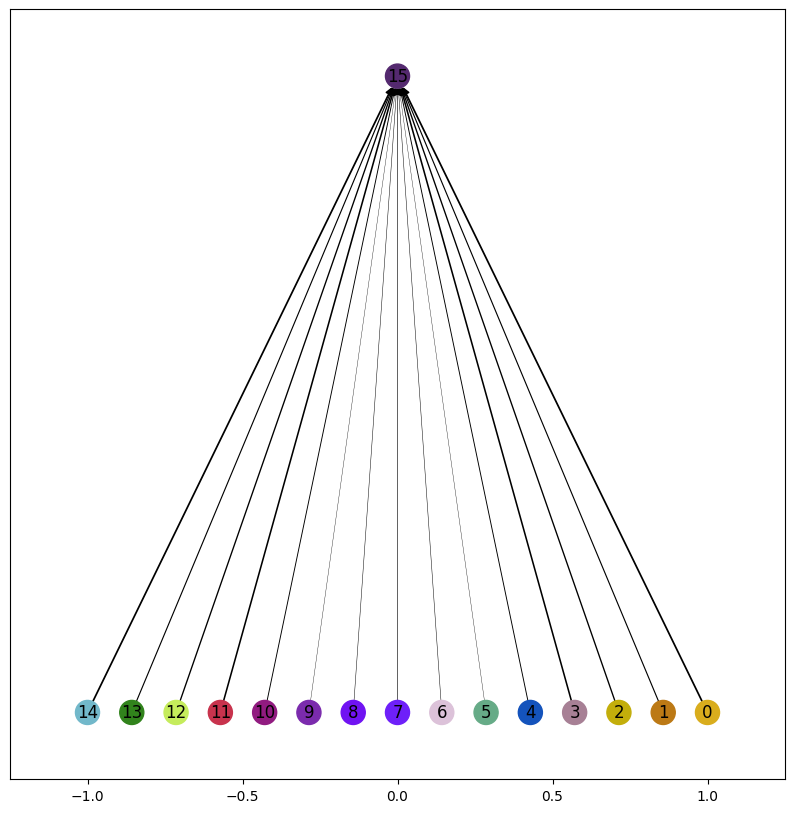

In [37]:
visualize.visualize_influencer_followers(content_market, stats.consumer_stats, agent_colors)

{0: (1.0, 0), 1: (0.857142857142857, 0), 2: (0.7142857142857142, 0), 3: (0.5714285714285714, 0), 4: (0.4285714285714284, 0), 5: (0.2857142857142856, 0), 6: (0.1428571428571428, 0), 7: (0.0, 0), 8: (-0.1428571428571429, 0), 9: (-0.2857142857142858, 0), 10: (-0.4285714285714286, 0), 11: (-0.5714285714285714, 0), 12: (-0.7142857142857143, 0), 13: (-0.8571428571428572, 0), 14: (-1.0, 0), 15: (0, 1), 'External': (1, 1)}


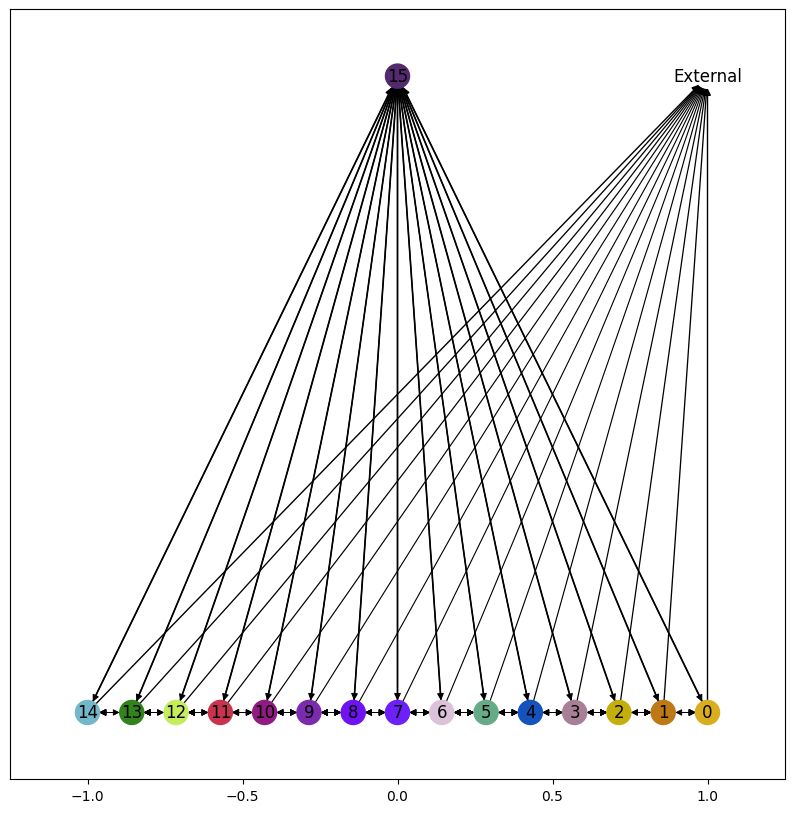

In [38]:
visualize.visualize_market(content_market, stats, agent_colors)

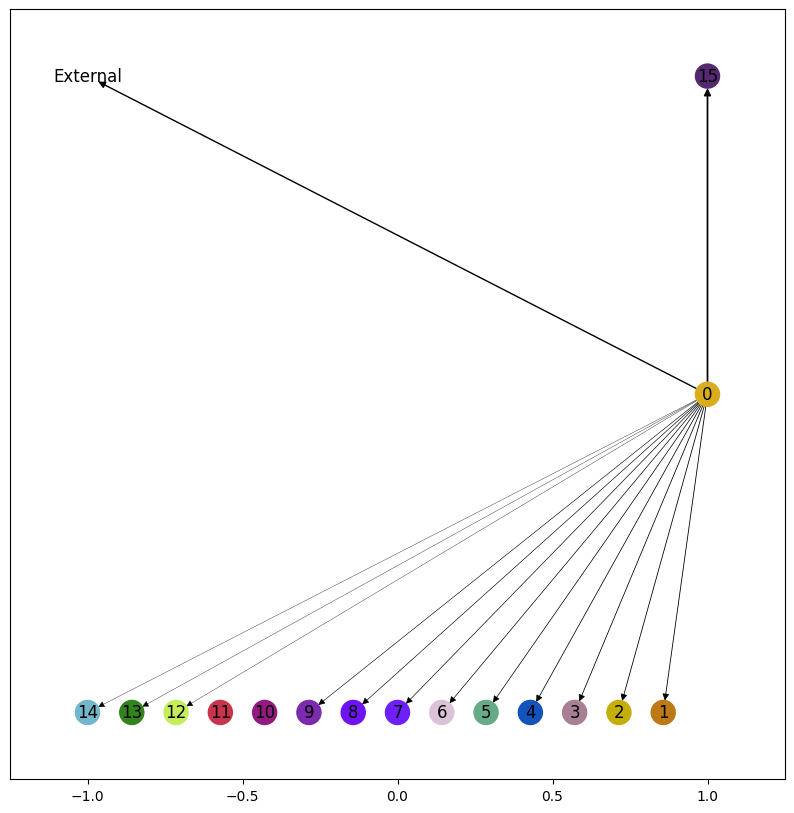

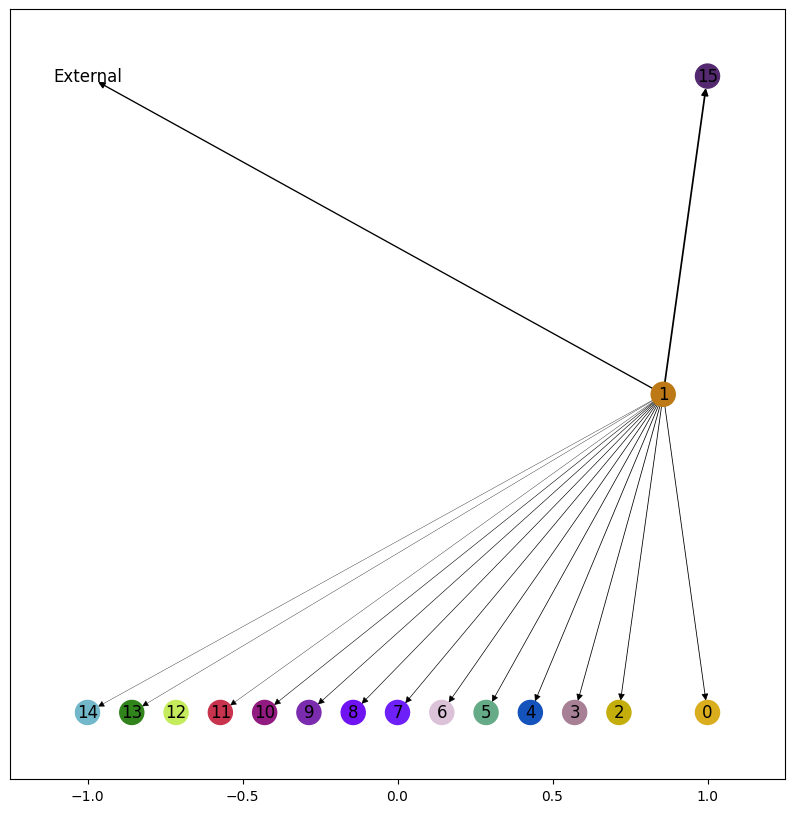

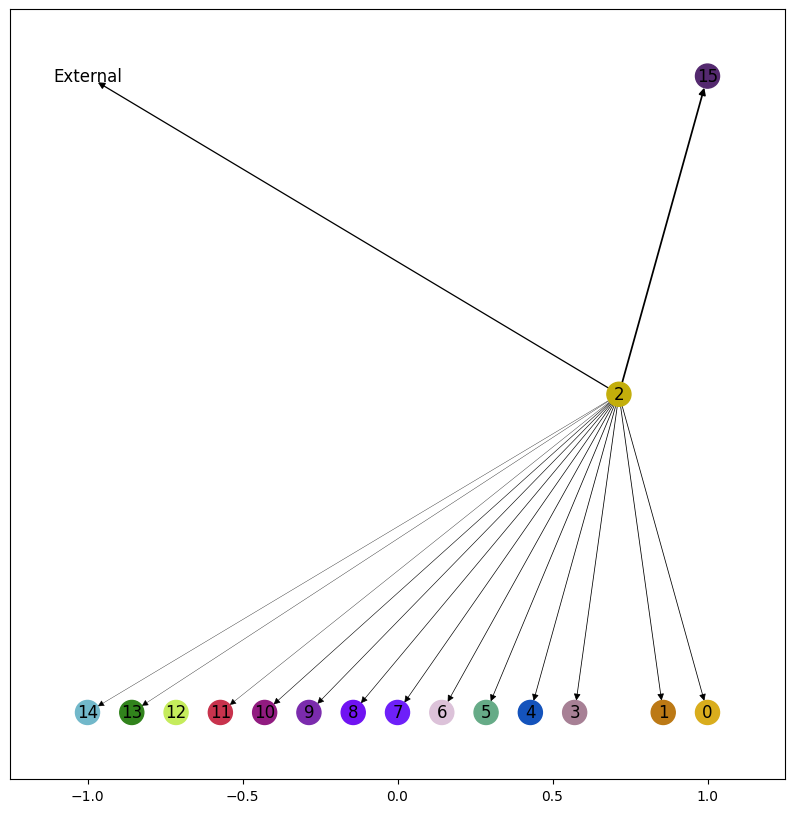

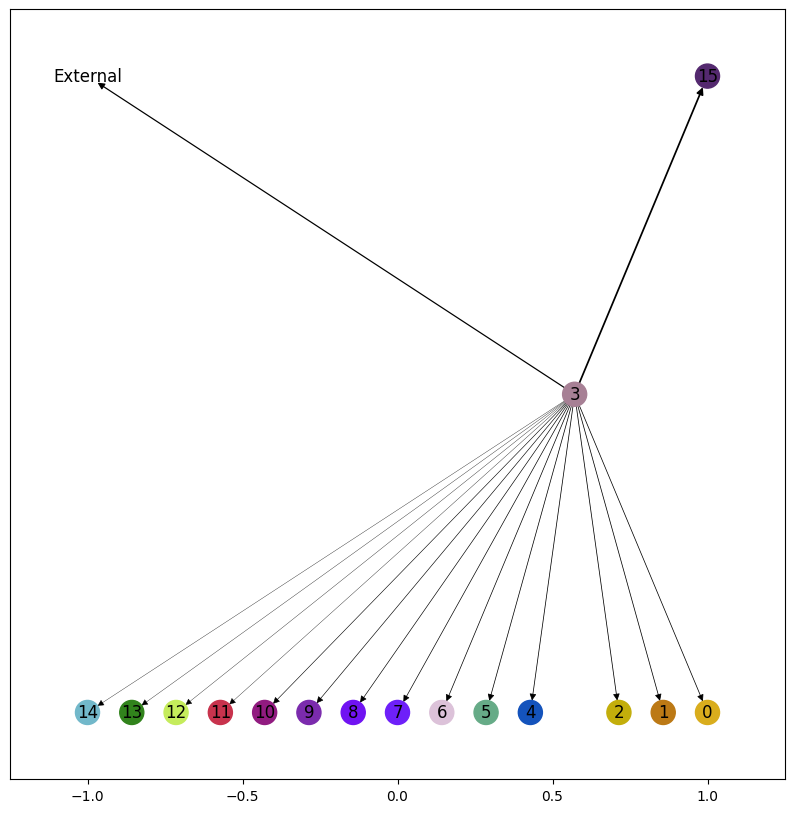

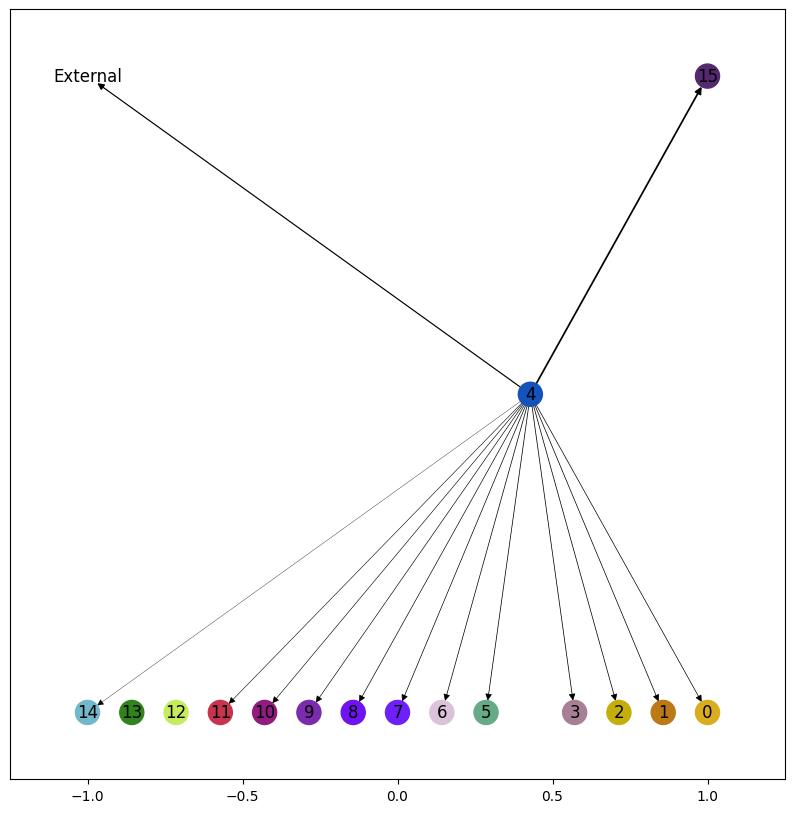

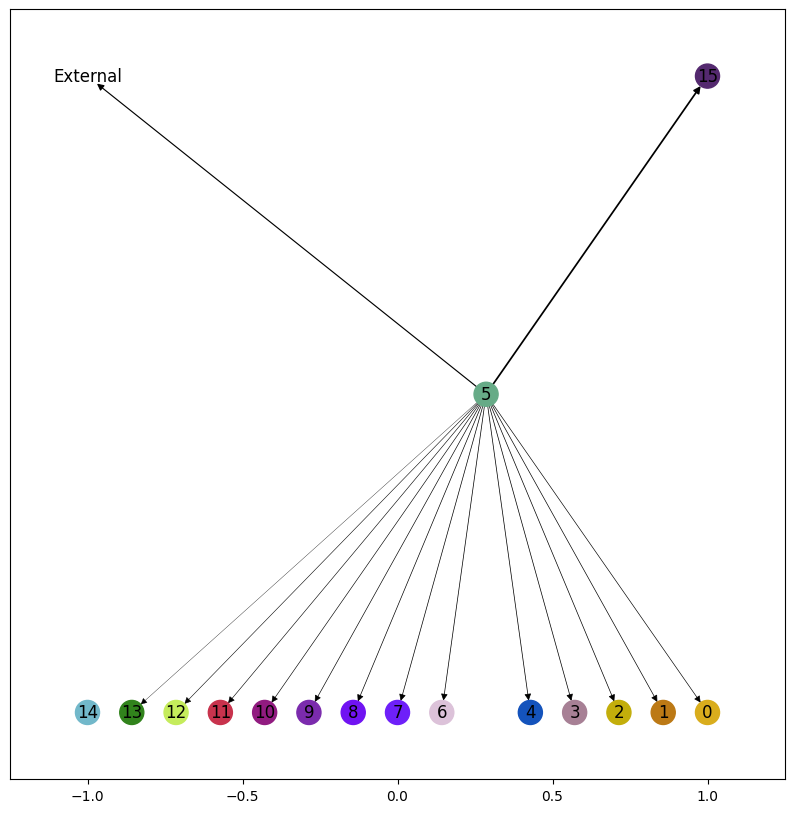

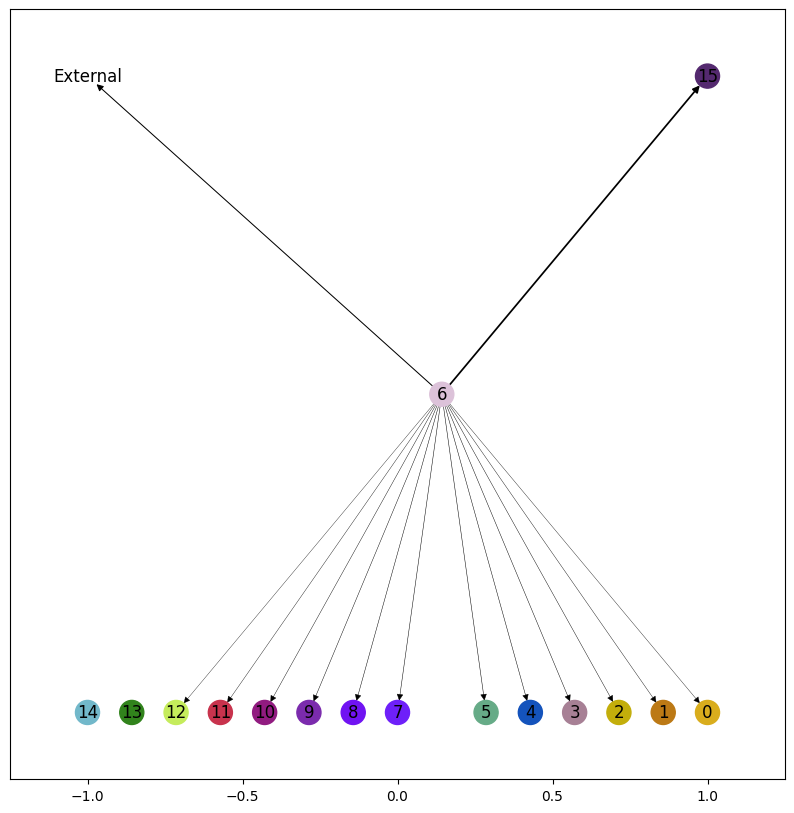

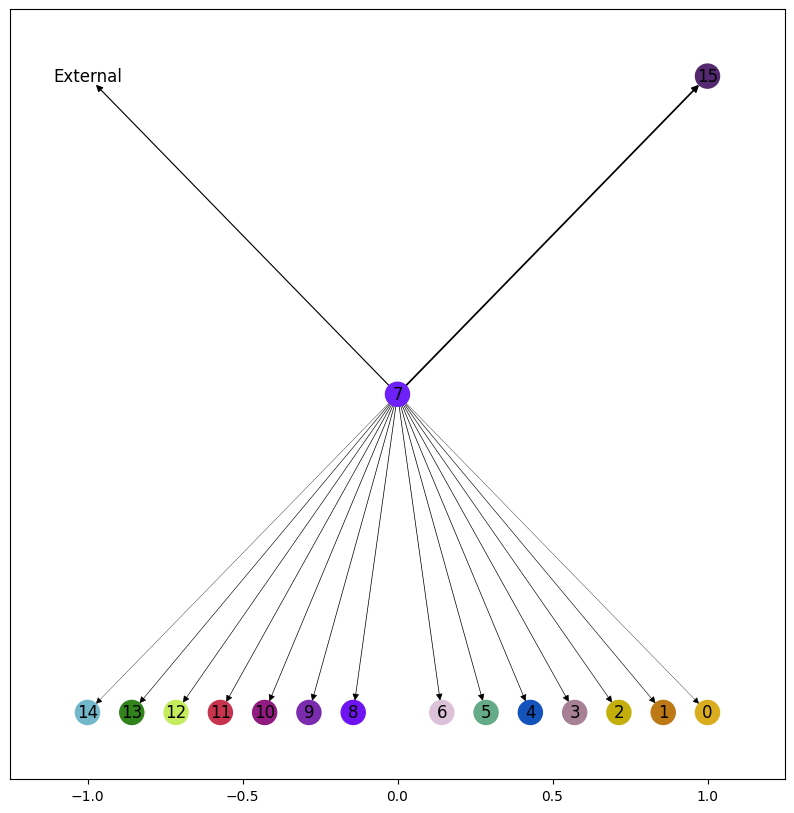

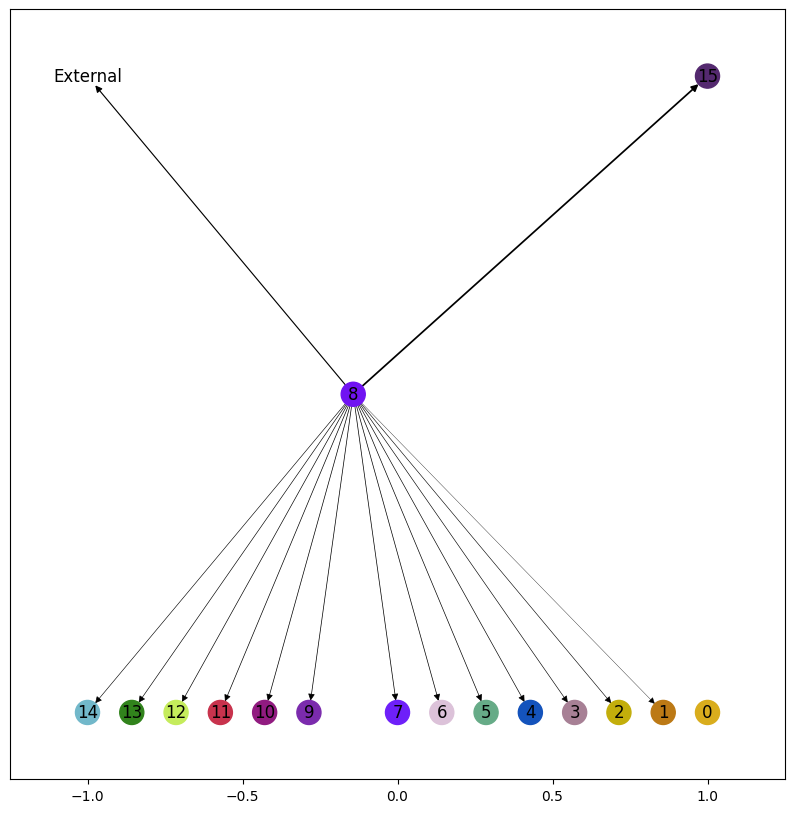

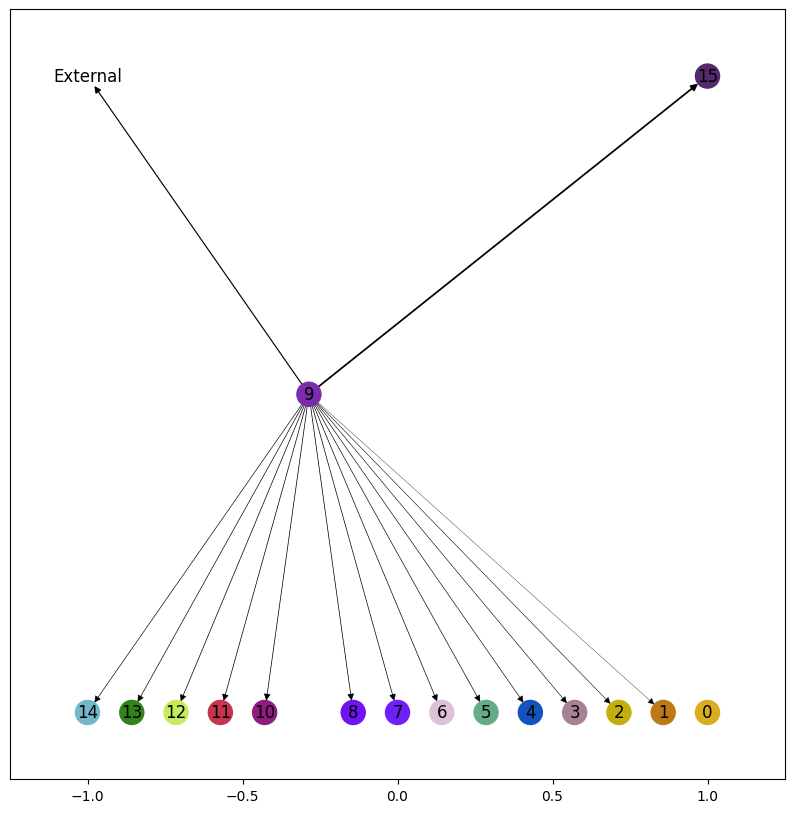

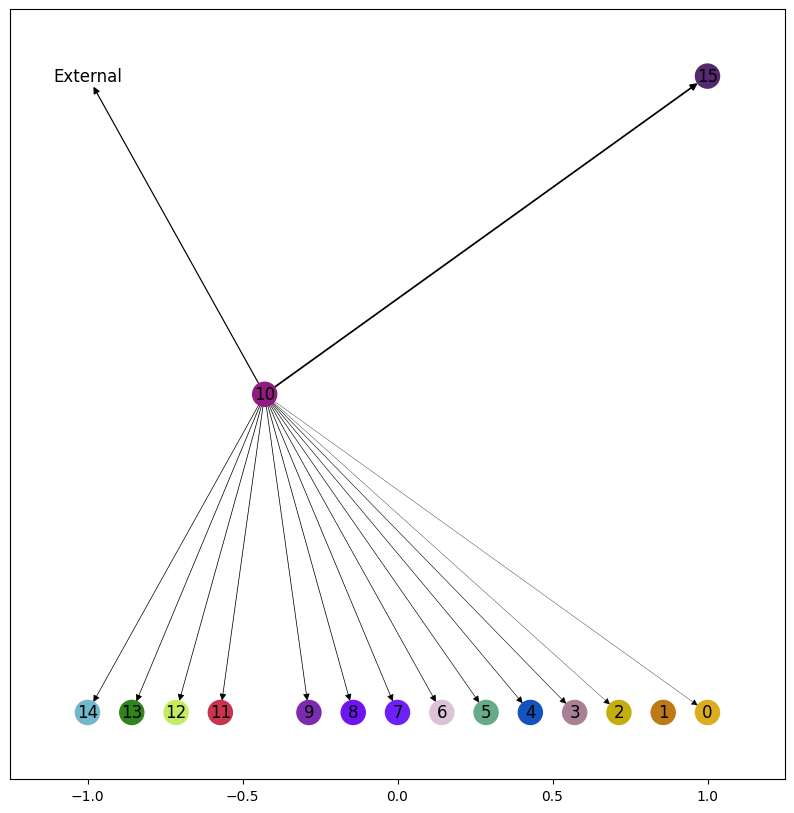

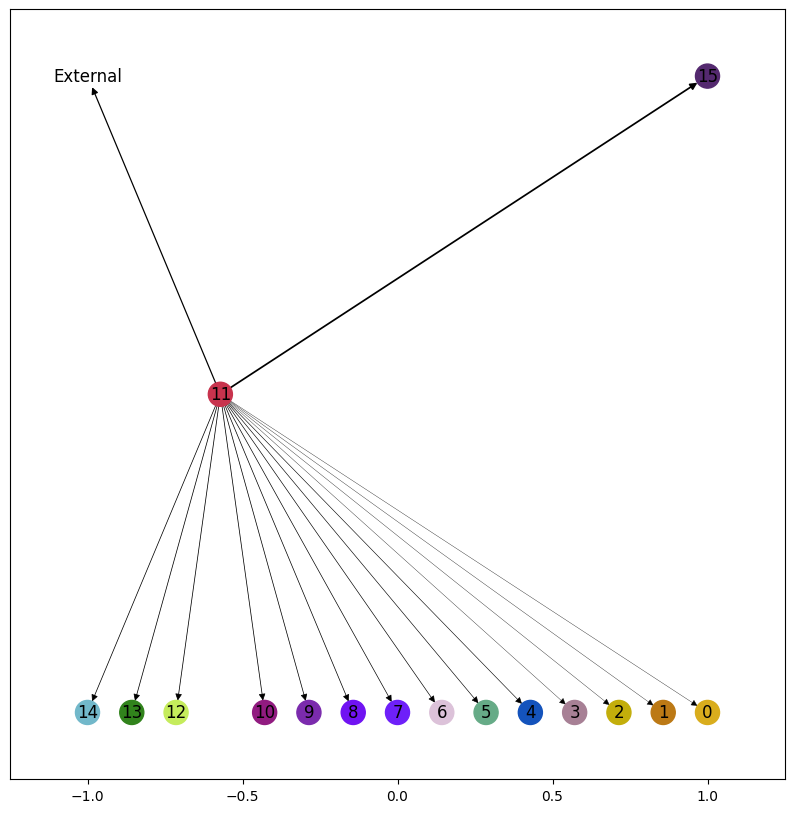

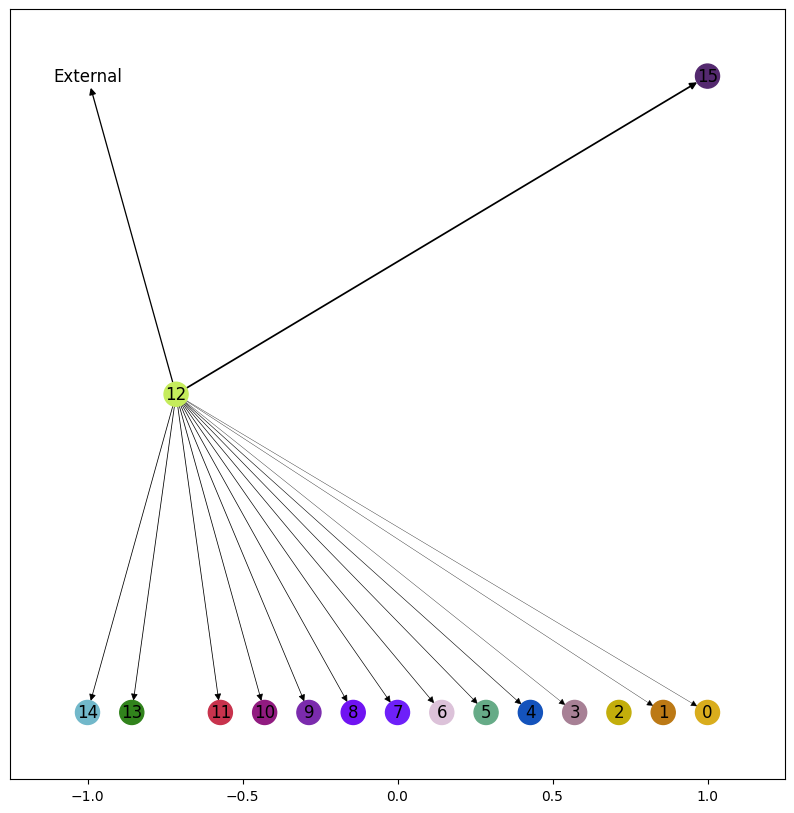

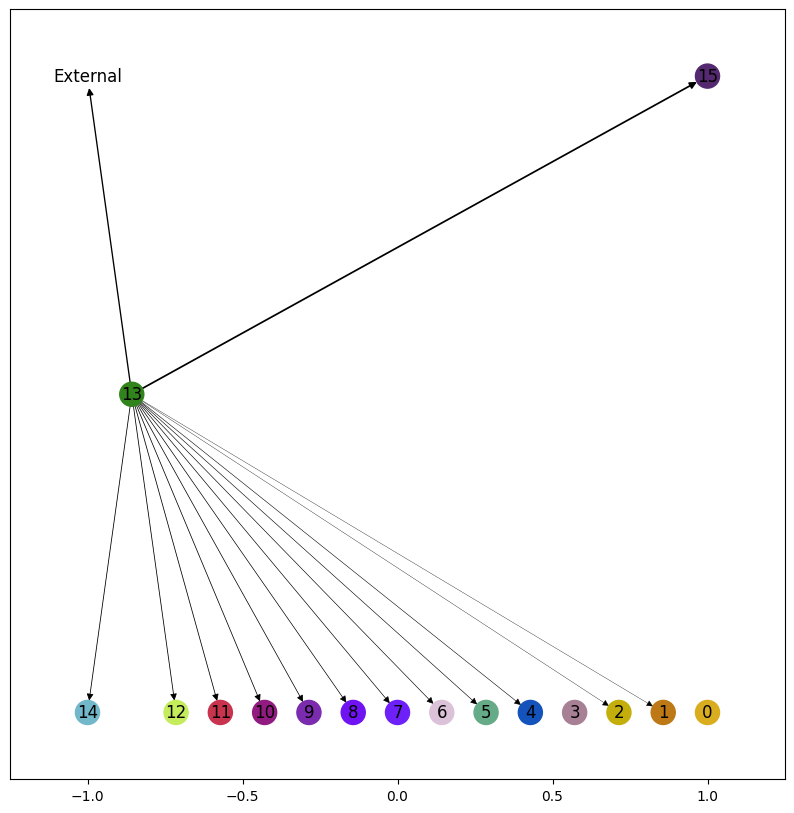

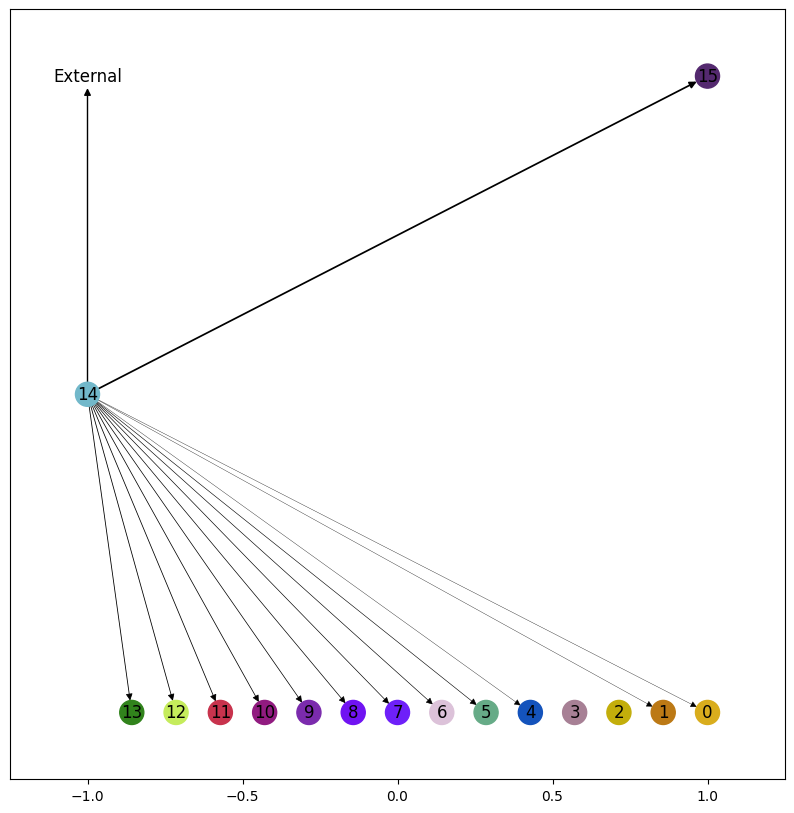

In [39]:
for consumer in content_market.consumers:
    visualize.visualize_consumer(content_market, stats.consumer_stats[consumer.index], agent_colors)

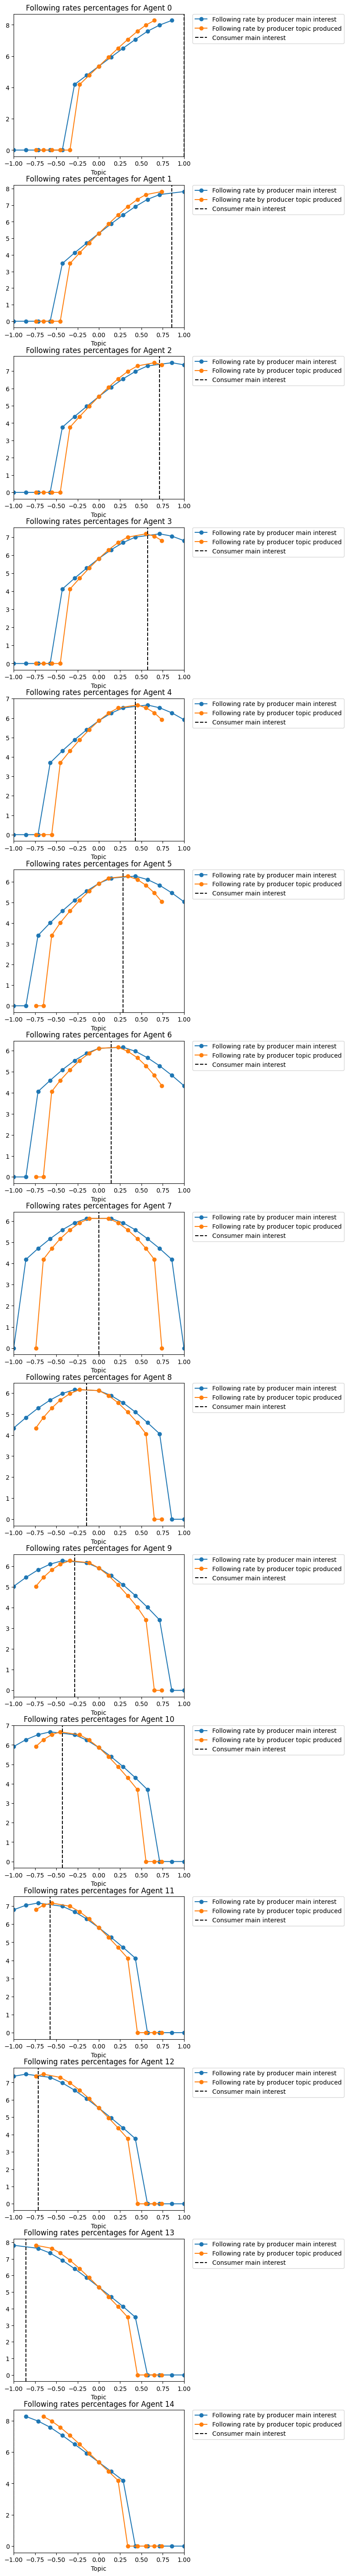

In [40]:
visualize.plot_agent_following_rates(content_market.consumers, stats.consumer_stats, agent_colors)

In [41]:
stats.to_dict()

{'num_iterations': 3,
 'total_consumer_utility': [0,
  164.44092407149046,
  164.70358866274276,
  164.7100394681467],
 'total_producer_utility': [0,
  132.05023020482412,
  132.4670049643322,
  132.47226541064234],
 'total_influencer_utility': [0,
  80.00558232103542,
  80.00563779128477,
  80.025770537182],
 'total_social_welfare': [0,
  164.44092407149046,
  164.70358866274276,
  164.7100394681467],
 'average_consumer_rate_change': [0,
  4.6047686398582535,
  0.2524970594804223,
  0.05665346275849558],
 'average_producer_topic_change': [0,
  0.15069325610635004,
  0.03135200481740223,
  0.003620522128743502],
 'average_influencer_rate_change': [0,
  0.7496319217463018,
  0.23666073346842575,
  0.006464635567088609],
 'average_consumer_utility_change': [0,
  10.962728271432697,
  0.01751097275014975,
  0.00043005369359943777],
 'average_producer_utility_change': [0,
  8.803348680321609,
  0.027784983967205492,
  0.0003506964206777615],
 'average_influencer_utility_change': [0,
  80.0

In [42]:
sorted([c.main_interest for c in content_market.consumers])

[array([-1.]),
 array([-0.85714286]),
 array([-0.71428571]),
 array([-0.57142857]),
 array([-0.42857143]),
 array([-0.28571429]),
 array([-0.14285714]),
 array([0.]),
 array([0.14285714]),
 array([0.28571429]),
 array([0.42857143]),
 array([0.57142857]),
 array([0.71428571]),
 array([0.85714286]),
 array([1.])]